In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import keras
from keras.utils import np_utils
from keras.models import Model, Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from keras.applications.resnet50 import ResNet50
from keras.utils.vis_utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import pickle
import itertools

np.random.seed(123)

In [2]:
import sys

import tensorflow.keras
import sklearn as sk

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.1.0
Keras Version: 2.2.4-tf

Python 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
Pandas 1.2.1
Scikit-Learn 0.24.1
GPU is available


In [38]:
train_dir = 'dataset/handwritten_character/Train'
val_dir = 'dataset/handwritten_character/Validation'

idg = ImageDataGenerator(rescale=1./255)
                       

# get all the data in the directory train (834036 images), and reshape them
train_generator = idg.flow_from_directory(train_dir, color_mode = 'grayscale',
                                         target_size=(32, 32),
                                         batch_size = 834036,
                                         class_mode ='categorical')

# get all the data in the directory validation (22524 images), and reshape them
valid_generator = idg.flow_from_directory(val_dir, color_mode = 'grayscale',
                                         target_size=(32, 32),
                                         batch_size = 22524,
                                         class_mode ='categorical')

# create the data sets
# train_images, train_labels = next(train_generator)
# val_images, val_labels = next(valid_generator)

Found 834036 images belonging to 39 classes.
Found 22524 images belonging to 39 classes.


In [40]:
# Saving the train images/labels
save_path = "pickle_files/"

# with open(os.path.join(save_path, "train_cat.pkl"), "wb") as f:
#     pickle.dump((train_images, train_labels), f)

In [41]:
# Saving the val images/labels

# with open(os.path.join(save_path, "val_cat.pkl"), "wb") as f:
#     pickle.dump((val_images, val_labels), f)

In [26]:
# Load train images/labels
with open(os.path.join(save_path, "train_cat.pkl"), "rb") as f:
    (train_images, train_labels) = pickle.load(f)

In [27]:
# Load val images/labels
with open(os.path.join(save_path, "val_cat.pkl"), "rb") as f:
    (val_images, val_labels) = pickle.load(f)

In [42]:
# Explore your dataset
print('Train images shape: ', train_images.shape)
print('Val images shape: ', val_images.shape)
print('Train labels shape: ', train_labels.shape)
print('Val labels shape: ', val_labels.shape)

Train images shape:  (834036, 32, 32, 1)
Val images shape:  (22524, 32, 32, 1)
Train labels shape:  (834036, 39)
Val labels shape:  (22524, 39)


In [61]:
train_img_unrow = train_images.reshape(834036, -1)

In [64]:
val_img_unrow = val_images.reshape(22524, -1)

In [65]:
np.shape(train_img_unrow)

(834036, 1024)

In [66]:
np.shape(val_img_unrow)

(22524, 1024)

In [67]:
train_labels_final = train_labels.reshape(834036, -1)

In [68]:
np.shape(train_labels_final)

(834036, 39)

In [69]:
val_labels_final = val_labels.reshape(22524, -1)

In [70]:
np.shape(val_labels_final)

(22524, 39)

In [71]:
kVals = np.arange(1,10,2)

for k in kVals:
    
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_img_unrow, train_labels_final)
    
    score = model.score(val_img_unrow, val_labels_final)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))

k=1, accuracy=93.55%
k=3, accuracy=91.48%
k=5, accuracy=90.61%
k=7, accuracy=90.18%
k=9, accuracy=89.82%


In [74]:
model_1 = KNeighborsClassifier(n_neighbors=1)
model_1.fit(train_img_unrow, train_labels_final)

score = model_1.score(val_img_unrow, val_labels_final)

In [76]:
score

0.9355354288758657

In [75]:
# Save the model to disk
save_path = "saved_models/"

with open(os.path.join(save_path, "KNN_model.pkl"), "wb") as f:
    pickle.dump(model_1, f)

In [ ]:
# Load model from file

with open(os.path.join(save_path, "KNN_model.pkl"), "rb") as f:
    pickled_model = pickle.load(f)

In [31]:
# Save model

model_4.save('saved_models/CNN_model_4')

In [32]:
# Load model

model_4 = keras.models.load_model('saved_models/CNN_model_4')

In [ ]:
#predict on the KNN model

In [78]:
predictions = model_1.predict(val_img_unrow)

KeyboardInterrupt: 

In [42]:
cm = confusion_matrix(y_true=LB.inverse_transform(val_labels), y_pred=np.argmax(predictions, axis=1))

In [43]:
cm_plot_labels= list(train_generator.class_indices.keys())

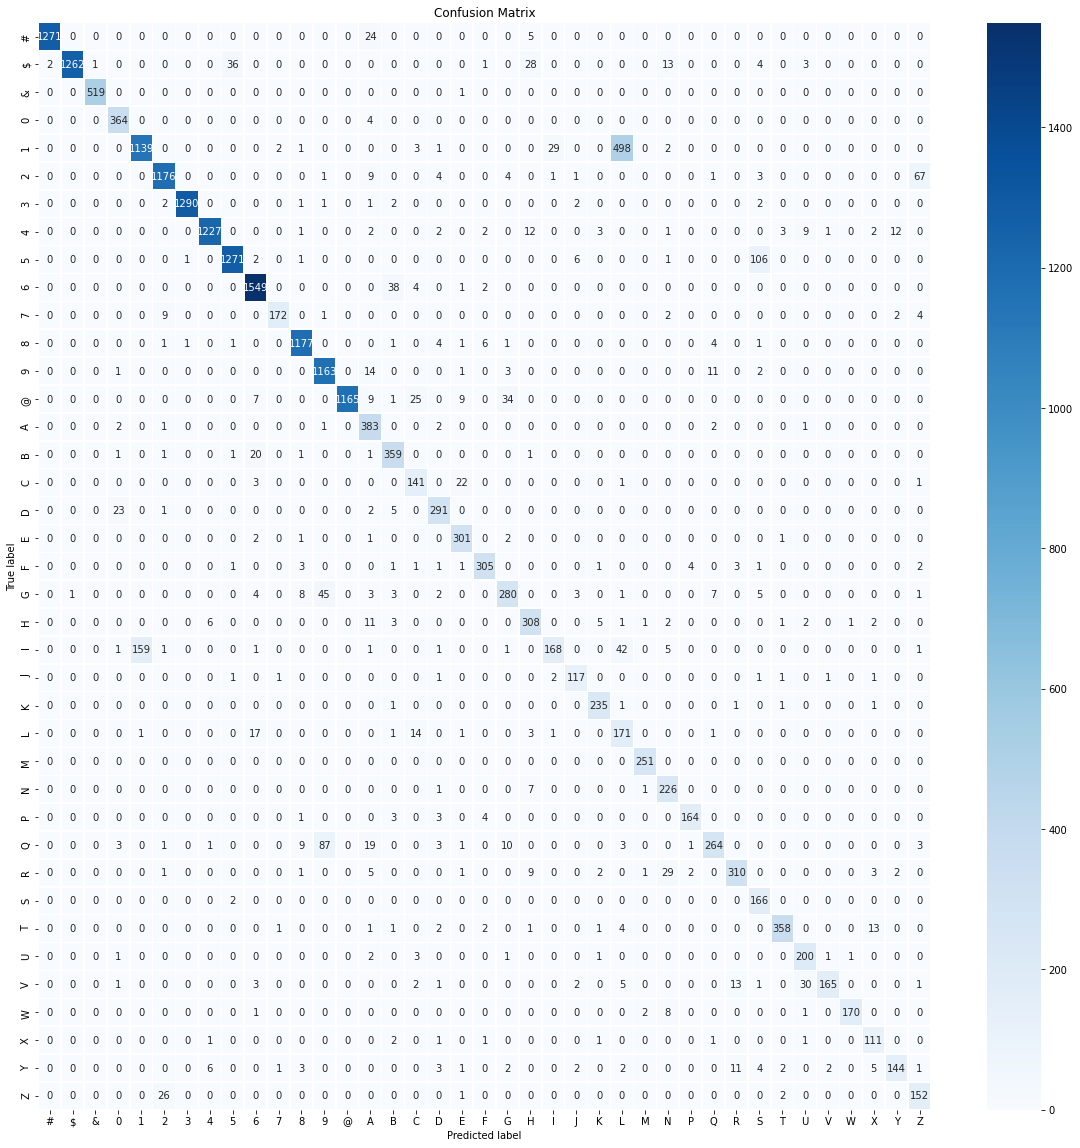

In [44]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(cm, xticklabels=cm_plot_labels, yticklabels=cm_plot_labels, annot=True, fmt='d', cmap='Blues', linewidths=.5)
ax.set(xlabel='Predicted label', ylabel='True label', title='Confusion Matrix')
plt.show()

In [153]:
import plotly.express as px

In [155]:
# px.imshow(cm, x=cm_plot_labels, y=cm_plot_labels)

In [45]:
names_train = pd.read_csv('dataset/handwritting_names/written_name_train_v2.csv')

In [46]:
names_train.head()

,FILENAME,IDENTITY
0,TRAIN_00001.jpg,BALTHAZAR
1,TRAIN_00002.jpg,SIMON
2,TRAIN_00003.jpg,BENES
3,TRAIN_00004.jpg,LA LOVE
4,TRAIN_00005.jpg,DAPHNE


In [47]:
names_train.IDENTITY.value_counts().head(20)

THOMAS       1825
EMPTY        1796
LEA          1582
EMMA         1482
LUCAS        1479
CAMILLE      1367
HUGO         1367
CLEMENT      1313
MANON        1277
LOUIS        1257
THEO         1214
CHLOE        1204
ANTOINE      1168
MARIE        1156
ENZO         1148
CLARA        1143
PAUL         1118
NATHAN       1107
ALEXANDRE    1080
MAXIME       1066
Name: IDENTITY, dtype: int64

In [48]:
# Are there names that are lower case?

In [49]:
# turn this into a top 20 names list

In [50]:
names_train[names_train.IDENTITY == 'CLARA'].head(10)

,FILENAME,IDENTITY
256,TRAIN_00257.jpg,CLARA
410,TRAIN_00411.jpg,CLARA
440,TRAIN_00441.jpg,CLARA
1142,TRAIN_01143.jpg,CLARA
1164,TRAIN_01165.jpg,CLARA
1480,TRAIN_01481.jpg,CLARA
1808,TRAIN_01809.jpg,CLARA
2020,TRAIN_02021.jpg,CLARA
2511,TRAIN_02512.jpg,CLARA
2596,TRAIN_02597.jpg,CLARA


In [51]:
def sort_contours(cnts, method='left-to-right'):
    reverse = False
    i = 0
    if method == 'right-to-left' or method == 'bottom-to-top':
        reverse = True
    if method == 'top-to-bottom' or method == 'botton-to-top':
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
       key = lambda b:b[1][i], reverse=reverse))
    return (cnts, boundingBoxes)

In [52]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model_4.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        ypred = [k for k, v in train_generator.class_indices.items() if v == ypred]
        [x] = ypred
        letters.append(x)
    return letters, image

In [53]:
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [54]:
# ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)

In [55]:
# dilated = cv2.dilate(thresh1, None, iterations=2)

In [56]:
# cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [57]:
# cnts = imutils.grab_contours(cnts)

In [58]:
# cnts = sort_contours(cnts, method="left-to-right")[0]

In [59]:
# for c in cnts:
#         if cv2.contourArea(c) > 10:
#             (x, y, w, h) = cv2.boundingRect(c)
#             cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [49]:
# roi = gray[y:y + h, x:x + w]

In [50]:
# thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

In [51]:
# thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)

In [52]:
# thresh = thresh.astype("float32") / 255.0

In [53]:
# thresh = np.expand_dims(thresh, axis=-1)

In [54]:
# thresh = thresh.reshape(1,32,32,1)

In [55]:
# ypred = model_1.predict(thresh)

In [56]:
# ypred = LB.inverse_transform(ypred)

In [57]:
# ypred

In [60]:
def get_word(letter):
    word = "".join(letter)
    return word

CLARA


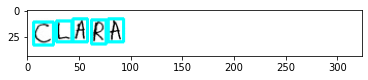

In [61]:
letter, image = get_letters("dataset/handwritting_names/train_v2/train/TRAIN_00411.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)